In [1]:
%load_ext autoreload
%autoreload 1

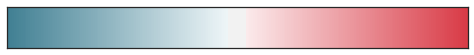

In [2]:
# base libs
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [3]:
%aimport dasci.data.explore

import dasci.data.explore as expl

In [4]:
df = pd.read_pickle(expl.full_path_name(r'output\train-fe-basic.pickle'))

## 1. Log transform of skewed numerical features

In [5]:
from scipy.stats import skew

def transform_skewed_features(df: pd.DataFrame):
    numerical_features = df.select_dtypes(exclude = ["object"]).columns

    skewness = df[numerical_features].apply(lambda x: skew(x))
    skewness = skewness[abs(skewness) > 0.5]
    print(f"{skewness.shape[0]} skewed numerical features ({skewness.index}) have been log-transformed.")
    skewed_features = skewness.index
    df[skewed_features] = np.log1p(df[skewed_features])

In [6]:
transform_skewed_features(df)

36 skewed numerical features (Index(['LotArea', 'LotShape', 'LandSlope', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'MiscVal'],
      dtype='object')) have been log-transformed.


## 2. New features introduction

Based on https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

Then we will create new features, in 3 ways:
* Simplifications of existing features
* Combinations of existing features
* Polynomials on the top 10 existing features

1. Simplification 

In [7]:
df["SimplOverallQual"] = df.OverallQual.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                 4 : 2, 5 : 2, 6 : 2, # average
                                                 7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                 })
df["SimplOverallCond"] = df.OverallCond.replace({1 : 1, 2 : 1, 3 : 1, # bad
                                                 4 : 2, 5 : 2, 6 : 2, # average
                                                 7 : 3, 8 : 3, 9 : 3, 10 : 3 # good
                                                 })
df["SimplGarageCond"] = df.GarageCond.replace({1 : 1, # bad
                                               2 : 1, 3 : 1, # average
                                               4 : 2, 5 : 2 # good
                                               })
df["SimplGarageQual"] = df.GarageQual.replace({1 : 1, # bad
                                               2 : 1, 3 : 1, # average
                                               4 : 2, 5 : 2 # good
                                               })
df["SimplFunctional"] = df.Functional.replace({1 : 1, 2 : 1, # bad
                                               3 : 2, 4 : 2, # major
                                               5 : 3, 6 : 3, 7 : 3, # minor
                                               8 : 4 # typical
                                               })
df["SimplKitchenQual"] = df.KitchenQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplHeatingQC"] = df.HeatingQC.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplBsmtFinType1"] = df.BsmtFinType1.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtFinType2"] = df.BsmtFinType2.replace({1 : 1, # unfinished
                                                         2 : 1, 3 : 1, # rec room
                                                         4 : 2, 5 : 2, 6 : 2 # living quarters
                                                        })
df["SimplBsmtCond"] = df.BsmtCond.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplBsmtQual"] = df.BsmtQual.replace({1 : 1, # bad
                                                 2 : 1, 3 : 1, # average
                                                 4 : 2, 5 : 2 # good
                                                })
df["SimplExterCond"] = df.ExterCond.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })
df["SimplExterQual"] = df.ExterQual.replace({1 : 1, # bad
                                                   2 : 1, 3 : 1, # average
                                                   4 : 2, 5 : 2 # good
                                                  })

2. Combine existing features

In [8]:
# Overall quality of the house
df["OverallGrade"] = df["OverallQual"] * df["OverallCond"]
# Overall quality of the garage
df["GarageGrade"] = df["GarageQual"] * df["GarageCond"]
# Overall quality of the exterior
df["ExterGrade"] = df["ExterQual"] * df["ExterCond"]
# Overall garage score
df["GarageScore"] = df["GarageArea"] * df["GarageQual"]
# Simplified overall quality of the house
df["SimplOverallGrade"] = df["SimplOverallQual"] * df["SimplOverallCond"]
# Simplified overall quality of the exterior
df["SimplExterGrade"] = df["SimplExterQual"] * df["SimplExterCond"]
# Simplified overall garage score
df["SimplGarageScore"] = df["GarageArea"] * df["SimplGarageQual"]
# Total number of bathrooms
df["TotalBath"] = df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"]) + df["FullBath"] + (0.5 * df["HalfBath"])
# Total SF for house (incl. basement)
df["AllSF"] = df["GrLivArea"] + df["TotalBsmtSF"]
# Total SF for 1st + 2nd floors
df["AllFlrsSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
# Total SF for porch
df["AllPorchSF"] = df["OpenPorchSF"] + df["EnclosedPorch"] + df["3SsnPorch"] + df["ScreenPorch"]
# Has masonry veneer or not
df["HasMasVnr"] = df.MasVnrType.replace({"BrkCmn" : 1, "BrkFace" : 1, "CBlock" : 1, 
                                               "Stone" : 1, "None" : 0})
# House completed before sale or not
df["BoughtOffPlan"] = df.SaleCondition.replace({"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, 
                                                      "Family" : 0, "Normal" : 0, "Partial" : 1})

3. Polynomials on the top 10 existing features

In [9]:
# Find most important features relative to target
print("Find most important features relative to target")
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice[:11])

Find most important features relative to target
SalePrice            1.000000
OverallQual          0.817368
OverallGrade         0.776385
GrLivArea            0.730256
SimplOverallQual     0.706206
TotalBath            0.697596
GarageCars           0.680645
ExterQual            0.678306
SimplExterQual       0.678306
SimplOverallGrade    0.673861
KitchenQual          0.668011
Name: SalePrice, dtype: float64


In [10]:
# 3* Polynomials on the top 10 existing features
df["OverallQual-s2"] = df["OverallQual"] ** 2
df["OverallQual-s3"] = df["OverallQual"] ** 3
df["OverallQual-Sq"] = np.sqrt(df["OverallQual"])
df["AllSF-2"] = df["AllSF"] ** 2
df["AllSF-3"] = df["AllSF"] ** 3
df["AllSF-Sq"] = np.sqrt(df["AllSF"])
df["AllFlrsSF-2"] = df["AllFlrsSF"] ** 2
df["AllFlrsSF-3"] = df["AllFlrsSF"] ** 3
df["AllFlrsSF-Sq"] = np.sqrt(df["AllFlrsSF"])
df["GrLivArea-2"] = df["GrLivArea"] ** 2
df["GrLivArea-3"] = df["GrLivArea"] ** 3
df["GrLivArea-Sq"] = np.sqrt(df["GrLivArea"])
df["SimplOverallQual-s2"] = df["SimplOverallQual"] ** 2
df["SimplOverallQual-s3"] = df["SimplOverallQual"] ** 3
df["SimplOverallQual-Sq"] = np.sqrt(df["SimplOverallQual"])
df["ExterQual-2"] = df["ExterQual"] ** 2
df["ExterQual-3"] = df["ExterQual"] ** 3
df["ExterQual-Sq"] = np.sqrt(df["ExterQual"])
df["GarageCars-2"] = df["GarageCars"] ** 2
df["GarageCars-3"] = df["GarageCars"] ** 3
df["GarageCars-Sq"] = np.sqrt(df["GarageCars"])
df["TotalBath-2"] = df["TotalBath"] ** 2
df["TotalBath-3"] = df["TotalBath"] ** 3
df["TotalBath-Sq"] = np.sqrt(df["TotalBath"])
df["KitchenQual-2"] = df["KitchenQual"] ** 2
df["KitchenQual-3"] = df["KitchenQual"] ** 3
df["KitchenQual-Sq"] = np.sqrt(df["KitchenQual"])
df["GarageScore-2"] = df["GarageScore"] ** 2
df["GarageScore-3"] = df["GarageScore"] ** 3
df["GarageScore-Sq"] = np.sqrt(df["GarageScore"])

In [11]:
df.to_pickle(r"output\train-fe-advanced.pickle")